# Assignment 4

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

This assignment requires that you to find **at least** two datasets on the web which are related, and that you visualize these datasets to answer a question with the broad topic of **weather phenomena** (see below) for the region of **San Nicolás de los Garza, Nuevo León, Mexico**, or **Mexico** more broadly.

You can merge these datasets with data from different regions if you like! For instance, you might want to compare **San Nicolás de los Garza, Nuevo León, Mexico** to Ann Arbor, USA. In that case at least one source file must be about **San Nicolás de los Garza, Nuevo León, Mexico**.

You are welcome to choose datasets at your discretion, but keep in mind **they will be shared with your peers**, so choose appropriate datasets. Sensitive, confidential, illicit, and proprietary materials are not good choices for datasets for this assignment. You are welcome to upload datasets of your own as well, and link to them using a third party repository such as github, bitbucket, pastebin, etc. Please be aware of the Coursera terms of service with respect to intellectual property.

Also, you are welcome to preserve data in its original language, but for the purposes of grading you should provide english translations. You are welcome to provide multiple visuals in different languages if you would like!

As this assignment is for the whole course, you must incorporate principles discussed in the first week, such as having as high data-ink ratio (Tufte) and aligning with Cairo’s principles of truth, beauty, function, and insight.

Here are the assignment instructions:

 * State the region and the domain category that your data sets are about (e.g., **San Nicolás de los Garza, Nuevo León, Mexico** and **weather phenomena**).
 * You must state a question about the domain category and region that you identified as being interesting.
 * You must provide at least two links to available datasets. These could be links to files such as CSV or Excel files, or links to websites which might have data in tabular form, such as Wikipedia pages.
 * You must upload an image which addresses the research question you stated. In addition to addressing the question, this visual should follow Cairo's principles of truthfulness, functionality, beauty, and insightfulness.
 * You must contribute a short (1-2 paragraph) written justification of how your visualization addresses your stated research question.

What do we mean by **weather phenomena**?  For this category you might want to consider seasonal changes, natural disasters, or historical trends.

## Tips
* Wikipedia is an excellent source of data, and I strongly encourage you to explore it for new data sources.
* Many governments run open data initiatives at the city, region, and country levels, and these are wonderful resources for localized data sources.
* Several international agencies, such as the [United Nations](http://data.un.org/), the [World Bank](http://data.worldbank.org/), the [Global Open Data Index](http://index.okfn.org/place/) are other great places to look for data.
* This assignment requires you to convert and clean datafiles. Check out the discussion forums for tips on how to do this from various sources, and share your successes with your fellow students!

## Example
Looking for an example? Here's what our course assistant put together for the **Ann Arbor, MI, USA** area using **sports and athletics** as the topic. [Example Solution File](./readonly/Assignment4_example.pdf)

C:\Users\jp_gl\AppData\Local\Temp\ipykernel_7492\471069609.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  her['Month'] = pd.to_datetime(her['Month'], format='%Y-%m').dt.tz_localize('UTC')
C:\Users\jp_gl\AppData\Local\Temp\ipykernel_7492\471069609.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fam['Month'] = pd.to_datetime(fam['Month'], format='%Y-%m').dt.tz_localize('UTC')
C:\Users\jp_gl\AppData\Local\Temp\ipykernel_7492\471069609.py:71: SettingWithCopyWarning: 
A value is trying to be set on a 

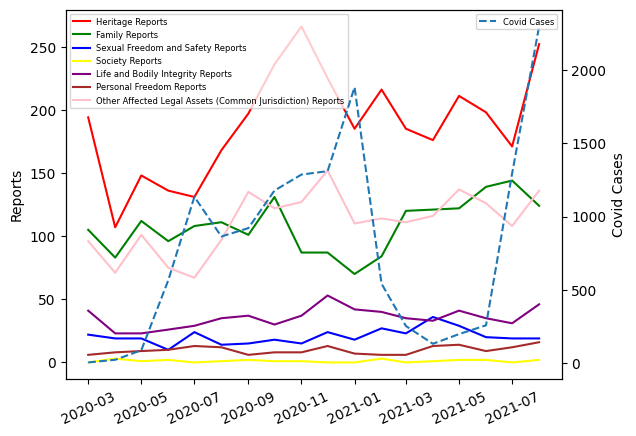

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from dotenv import load_dotenv

load_dotenv()

#csv for the covid cases
covid = pd.read_csv(os.getenv('covid_reports'))

#csv for complaints
comp = pd.read_csv(os.getenv('city_complaints'))

#cleaning data in both dataframes

#keeping only the relevant columns
covid = covid[covid['Municipality'] == "San Nicolás de los Garza"]
covid = covid[['Month','Daily Cases']]
comp = comp[['Month','Affected Legal Good', 'Value']]

#changing the labels from spanish to english
#regex = False because of ()
comp['Affected Legal Good'].replace(
    {'Patrimonio': 'Heritage', 'Familia':'Family', 'Libertad y Seguridad Sexual':'Sexual Freedom and Safety', 
     'Sociedad':'Society', 'Vida e Integridad Corporal':'Life and Bodily Integrity', 'Libertad Personal':'Personal Freedom', 
     'Otros Bienes Jurídicos Afectados (Del Fuero Común)':'Other Affected Legal Assets (Common Jurisdiction)'}, 
     inplace=True, regex=False)

#groupby of months
covid = covid.groupby(['Month'])['Daily Cases'].sum()
covid = covid.reset_index()


#changing daily to monthly cases
covid.rename(columns = {'Month' : 'Month', 'Daily Cases' : 'Monthly Cases'}, inplace = True)

#filtering the dates to correlate with the covid dataframe
#---test---
#comp = comp[['Month', 'Value']]
#comp = comp.groupby(['Month'])['Value'].sum()
#comp = comp.reset_index()
#---------

comp['Month'] = pd.to_datetime(comp['Month'], format='%Y-%m')


start_date = os.getenv('start_date')
end_date = os.getenv('end_date')
mask = (comp['Month'] > start_date) & (comp['Month'] <= end_date)
  
comp = comp.loc[mask]

#comp['Month'] = comp['Month'].dt.to_period('M')

covid = covid.iloc[0:18]

#filtering by affected legal good
her = comp[comp['Affected Legal Good'] == "Heritage"]
fam = comp[comp['Affected Legal Good'] == "Family"]
sex = comp[comp['Affected Legal Good'] == "Sexual Freedom and Safety"]
soc = comp[comp['Affected Legal Good'] == "Society"]
lif = comp[comp['Affected Legal Good'] == "Life and Bodily Integrity"]
per = comp[comp['Affected Legal Good'] == "Personal Freedom"]
oth = comp[comp['Affected Legal Good'] == "Other Affected Legal Assets (Common Jurisdiction)"]

#changing dtypes of months to object for easier management
#changing dtypes of months to datetime with UTC timezone
her['Month'] = pd.to_datetime(her['Month'], format='%Y-%m').dt.tz_localize('UTC')
fam['Month'] = pd.to_datetime(fam['Month'], format='%Y-%m').dt.tz_localize('UTC')
sex['Month'] = pd.to_datetime(sex['Month'], format='%Y-%m').dt.tz_localize('UTC')
soc['Month'] = pd.to_datetime(soc['Month'], format='%Y-%m').dt.tz_localize('UTC')
lif['Month'] = pd.to_datetime(lif['Month'], format='%Y-%m').dt.tz_localize('UTC')
per['Month'] = pd.to_datetime(per['Month'], format='%Y-%m').dt.tz_localize('UTC')
oth['Month'] = pd.to_datetime(oth['Month'], format='%Y-%m').dt.tz_localize('UTC')

#plotting
fig, ax1 = plt.subplots() # Generas el primer subplot aquí

ax1.plot_date(her['Month'], her['Value'], '-', color='red')
ax1.plot_date(fam['Month'], fam['Value'], '-', color='green')
ax1.plot_date(sex['Month'], sex['Value'], '-', color='blue')
ax1.plot_date(soc['Month'], soc['Value'], '-', color='yellow')
ax1.plot_date(lif['Month'], lif['Value'], '-', color='purple')
ax1.plot_date(per['Month'], per['Value'], '-', color='brown')
ax1.plot_date(oth['Month'], oth['Value'], '-', color='pink')
#plt.plot_date(comp['Month'], comp['Value'], '-', color='green')
#ax1.tick_params(axis='x', rotation=90)
plt.xticks(rotation=25)
ax1.legend(['Heritage Reports', 'Family Reports', 'Sexual Freedom and Safety Reports', 'Society Reports', 'Life and Bodily Integrity Reports', 'Personal Freedom Reports', 'Other Affected Legal Assets (Common Jurisdiction) Reports'], fontsize=6)
ax1.set_ylabel('Reports')

ax2 = ax1.twinx() # Creas un nuevo subplot que comparta el mismo eje X
ax2.plot_date(pd.to_datetime(covid['Month'], format='%Y-%m').dt.tz_localize('UTC'), covid['Monthly Cases'], '--') # Diferenciamos con línea punteada
ax2.legend(['Covid Cases'], fontsize=6, loc=1)
ax2.set_ylabel('Covid Cases')

plt.show()